# Задание #1: обработка синтетических данных

Студент: Александр Ли

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [128]:
def true_fun(x, a=np.pi, b = 0, f=np.cos):
    x = np.atleast_1d(x)[:]
    a = np.atleast_1d(a)
    
    if f is None: f = lambda x:x # line
    x = np.sum([ai*np.power(x, i+1) for i,ai in enumerate(a)],axis=0)

    return f(x+ b)

def noises(shape , noise_power):
    return np.random.randn(*shape) *noise_power

def dataset(a, b, f = None,  N = 250, x_max =1, noise_power = 0, random_x = True,  seed = 42):
    np.random.seed(seed)
    
    if random_x:
        x = np.sort(np.random.rand(N))*x_max    
    else:
        x = np.linspace(0,x_max,N)
    
    y_true = np.array([])
    
    for f_ in np.append([], f):
        y_true=np.append(y_true, true_fun(x, a, b, f_))
    
    y_true = y_true.reshape(-1,N).T
    y = y_true + noises(y_true.shape , noise_power)

    return y, y_true, np.atleast_2d(x).T

In [129]:
def vis_data(y, y_true,x, title):
    fig  = plt.figure(figsize=(15,10))
    plt.scatter(x[:,0], y, edgecolor='b', label="Зашумленные Данные",s=196, alpha = 0.6)
    plt.scatter(x[:,0], y_true,label="Реальные Данные", s=81,c='g', alpha = 0.8)
    plt.grid()
    plt.xlabel('x',fontsize=35)
    plt.ylabel('y',fontsize=35)
    plt.legend(fontsize=25)
    plt.title(title, fontsize=25 )
    plt.xticks(FontSize = 25)
    plt.yticks(FontSize = 25);
    plt.tight_layout()

**Линейная зависимость**

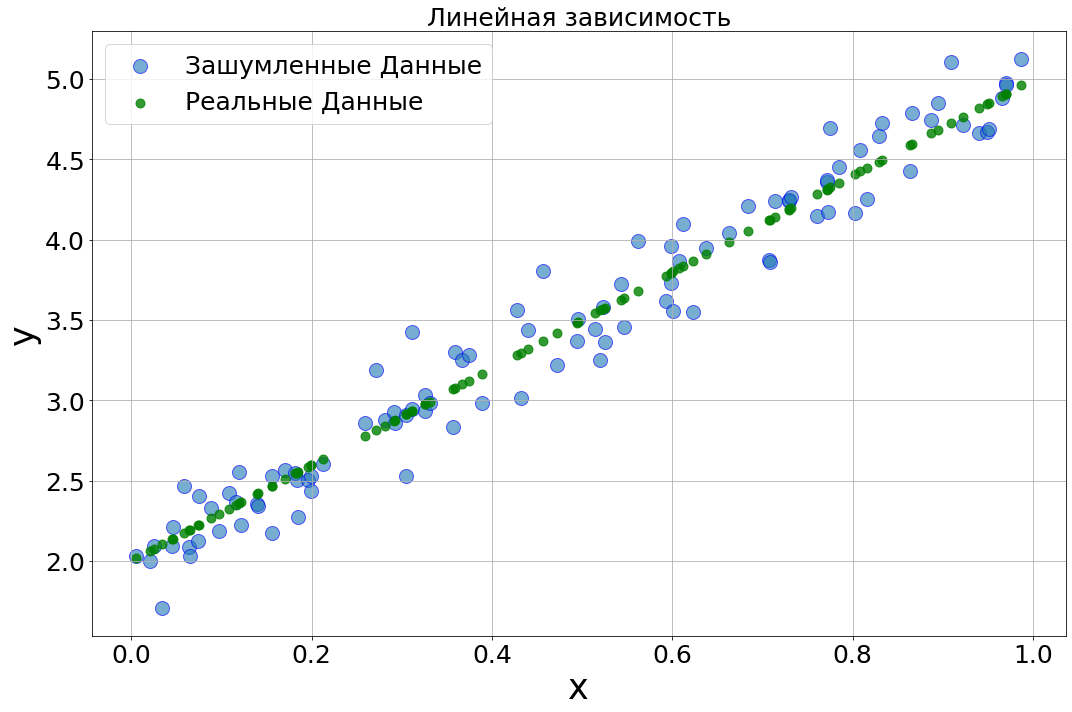

In [130]:
noise_power = 0.2

y, y_true, x = dataset(a = 3, b = 2,
                       f = None,  N = 100,
                       x_max =1, 
                       noise_power = noise_power,
                       seed = 42)
vis_data(y, y_true,x, 'Линейная зависимость')

**Выделение из входных данных тренировочной и тестовой выборок**

In [131]:
def train_test_split(x,y, train_size=None, test_size=None, random_state=42, shuffle=True,):
    if random_state: np.random.seed(random_state)
    
    size = y.shape[0]
    idxs = np.arange(size)
    if shuffle: np.random.shuffle(idxs)
    
    if test_size and train_size is None:
        if (test_size<= 1):  train_size = 1 - test_size
        else:  train_size = size - test_size
        test_size = None    
        
    if train_size is None or train_size > size: train_size = size
        
    if (train_size<= 1): train_size *= size
        
    if test_size is not None: 
        if test_size<= 1: test_size *= size    
        if test_size>size: test_size = size-train_size
    else: test_size = 0

    x_train, y_train = x[idxs[:int(train_size)]], y[idxs[:int(train_size)]]
    x_val,   y_val   = x[idxs[int(train_size):size - int(test_size)]], y[idxs[int(train_size):size - int(test_size)]]
    
    if test_size > 0:
        x_test, y_test = x[idxs[size - int(test_size):]], y[idxs[size - int(test_size):]]
        return x_train, y_train.squeeze(), x_val, y_val.squeeze(), x_test, y_test.squeeze() 
    return x_train, y_train.squeeze(), x_val, y_val.squeeze()


x_train, y_train, x_val, y_val, x_test, y_test = train_test_split(x, y, train_size = 1, test_size=0.5, )    
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape,  x_test.shape, y_test.shape )

    
x_train, y_train,  x_test, y_test = train_test_split(x, y,  test_size=0.5, )    
print(x_train.shape, y_train.shape,  x_test.shape, y_test.shape )



(100, 1) (100,) (0, 1) (0,) (50, 1) (50,)
(50, 1) (50,) (50, 1) (50,)


In [132]:
x_train, y_train,  x_test, y_test = train_test_split(x, y,  test_size=0.6, )    
print(x_train.shape, y_train.shape,  x_test.shape, y_test.shape )


(40, 1) (40,) (60, 1) (60,)


In [133]:
def init_weights(W_shape, add_bias = True, random_state = 42):
    W_shape = np.atleast_1d(W_shape)
    if random_state: 
        np.random.seed(random_state)
    W = np.random.randn(*list(W_shape))/np.sqrt(np.sum(W_shape))    
    if add_bias: 
        W = np.column_stack((np.zeros(W.shape[-1]),W ))
    return W.squeeze()

In [134]:
def predict( X, W, add_bias = True):
    if add_bias:
        X_full = np.column_stack((np.ones(X.shape[0]),X))
    else:
        X_full = X
    return  np.dot(X_full,W)

def loss_func(yhat, y):
    return np.square(yhat - y)  

In [135]:
x_train[:1]

array([[0.80839735]])

In [136]:
weights = init_weights(x.shape[1])
yhat = predict( x_train[0],weights)
loss = loss_func(yhat, y[0])

print(f'{weights}')
print(f'predict {yhat},\nground truth {y[0]},\nloss: {loss}')

[0.         0.49671415]
predict [0.4015424],
ground truth [2.03397577],
loss: [2.66483868]


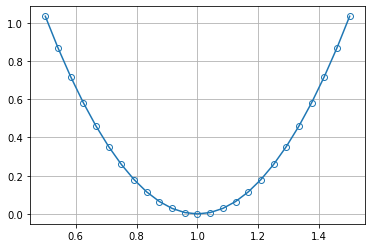

In [137]:
decline = np.linspace(start = 0.5, stop = 1.5,num = 25)
yhat = decline* y[0]
loss = loss_func(yhat, y[0])
plt.plot(decline,loss,'-o', mfc = 'none'); plt.grid(); 

In [138]:
def grad_loss(y_hat, y, X, add_bias = True):
    if add_bias:
        X_full = np.column_stack((np.ones(X.shape[0]),X))
    else:
        X_full = X
    return 2*np.dot(X_full.T, (y_hat - y)) / y.size  

In [139]:
yhat = predict(x_train[0], weights)

grad = grad_loss(yhat, y[0], x[0])
print(grad)

[-3.26486672 -0.01802898]


In [140]:
def update_weights(grad, W, learning_rate):
    return W - learning_rate*grad

In [141]:
lerning_rate = 0.15
weights = update_weights(grad, weights, lerning_rate)
print(weights)

[0.48973001 0.4994185 ]


In [142]:
yhat = predict( x_train[0],weights)
loss = loss_func(yhat, y[0])

print(f'{weights}')
print(f'predict {yhat},\nground truth {y[0]},\nloss: {loss}')

[0.48973001 0.4994185 ]
predict [0.8934586],
ground truth [2.03397577],
loss: [1.30077941]


**Обучение модели**

In [143]:
def fit(X, y, learning_rate, weights = None,  epochs=30):

    if weights is None: weights = init_weights(X.shape[1])
    cost    = np.zeros(epochs)

    for i in range(epochs): 
        yhat    = predict(X,weights)
        grad    = grad_loss(yhat,  y, X) 
        weights = update_weights(grad, weights, lerning_rate)  
        cost[i] = loss_func(yhat,  y).mean()
                
    return weights, cost

In [144]:
weights, cost = fit(x_train, y_train, learning_rate=0.15, epochs=10)


In [145]:
def plot_cost(cost):
    plt.plot(cost, 'o-', linewidth = 4, markersize = 15); 
    plt.grid()
    plt.xlabel("Эпоха",fontsize=35)
    plt.ylabel("Функция Потерь",fontsize=35)
    plt.xticks(FontSize = 25)

    plt.yticks(FontSize = 25);  

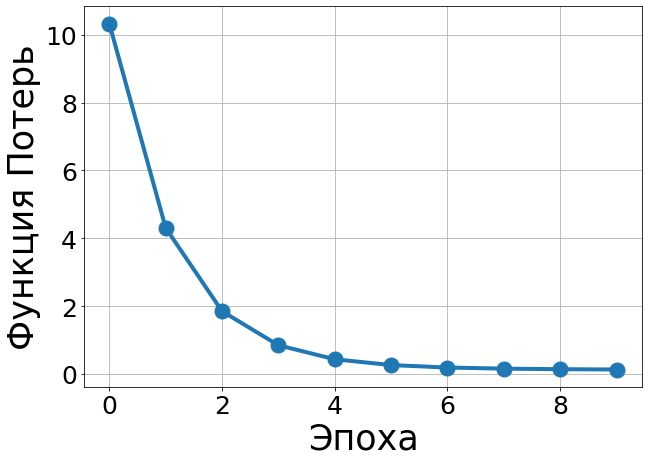

In [146]:
fig  = plt.figure(figsize=(10,7))

plot_cost(cost)


In [147]:
def r2_score(yhat, y):    
    return 1-(np.square(y-yhat)).sum(axis=0)/(np.square(y-np.mean(y, axis=0))).sum(axis=0)

In [148]:
predicts = predict( x_test,weights,)

r2_score(predicts, y_test), r2_score(predict(x_train,weights, ), y_train)

(0.8365742252222486, 0.8502862891970423)

In [149]:
def plot_model_weights(x_train, y_train, x_test, x, y, weights):
    plt.plot(x_train[:,0], predict(x_train,weights, ),
            '.', label='Предсказание на x_train',
            markersize = 15)
    plt.plot(x_test[:,0], predict(x_test,weights, ),
            'o', label='Предсказание на x_test',
            markersize = 15, alpha =0.8)
    plt.plot(x_train[:,0], y_train, '.',
            label="Тренировочные данные", linewidth=2,c='r')
    plt.plot(x[:,0], y, '--',
            label="Истинные Значения", linewidth=4,c='g')
    plt.legend(fontsize=20); plt.grid()
    plt.xlabel('x',fontsize=35)
    plt.ylabel('y',fontsize=35);
    plt.xticks(FontSize = 25)
    plt.yticks(FontSize = 25);

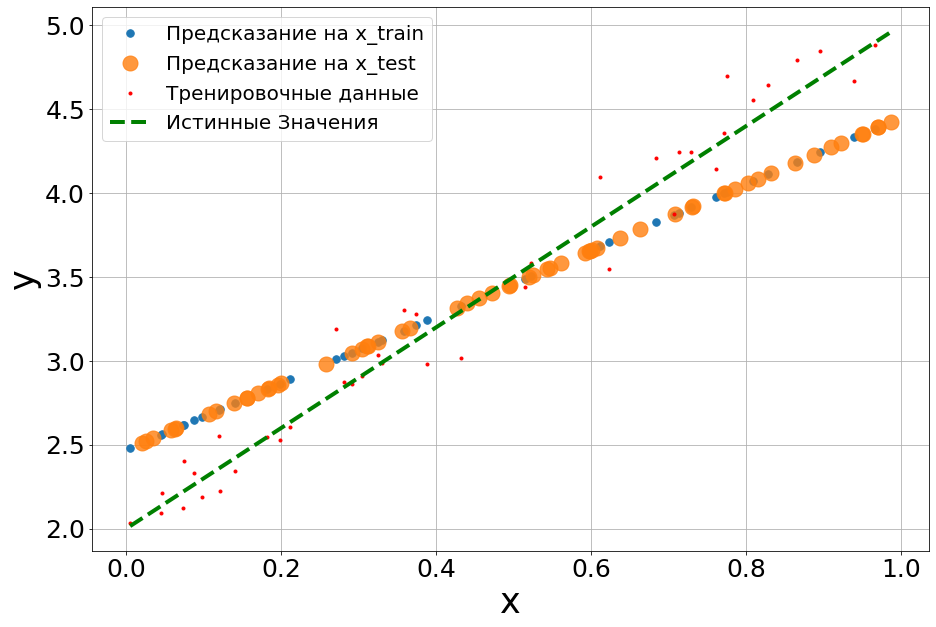

In [150]:
fig  = plt.figure(figsize=(15,10))

plot_model_weights(x_train, y_train, x_test, x, y_true, weights)

In [151]:
weights

array([2.47197448, 1.98016529])

In [152]:
def vis_weigths(weights):
    numbers = np.arange(0,len(weights))
    tick_labels = ['w'+str(num) for num in numbers]
    cc=['']*len(numbers)
    for n,val in enumerate(weights):
        if val<0:
            cc[n]='red'
        elif val>=0:
            cc[n]='blue'

    plt.bar(x = numbers, height = weights, color = cc)
    plt.xticks(np.arange(0,len(weights)),tick_labels );

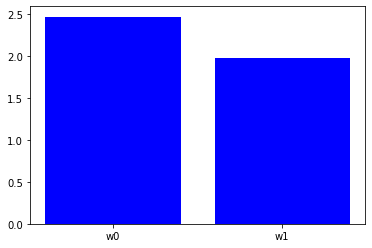

In [153]:
vis_weigths(weights)

In [154]:
def load_batch(X,y, batch_size = 100):
    idxs = np.arange(y.size)
    np.random.shuffle(idxs)

    for i_batch in range(0,y.size,batch_size):
        idx_batch = idxs[i_batch:i_batch+batch_size]
        x_batch   = np.take(X, idx_batch,axis=0)
        y_batch   = np.take(y, idx_batch)
        yield  x_batch, y_batch

In [155]:
BATCH = 10

def fit_SGD(X, y, lerning_rate, weights = None,  epochs=30, batch_size = 100, random_state = 42):
    
    if random_state: np.random.seed(random_state)

    if weights is None: weights = init_weights(X.shape[1])
    if batch_size is None or batch_size>y.size : batch_size = y.size
    n_batches = y.size//batch_size
    
    cost    = np.zeros(epochs)

    for i in range(epochs): 
        loss = 0
        for cnt,(x_batch, y_batch) in enumerate(load_batch(X,y, batch_size)): 

            yhat    = predict(x_batch, weights)
            grad    = grad_loss(yhat,  y_batch, x_batch) 
            weights = update_weights(grad, weights, lerning_rate) #backward 
            loss   += loss_func(yhat,  y_batch).mean()

            if cnt>= n_batches:
                break
        cost[i] = loss/n_batches

    return weights, cost

In [156]:
weights = init_weights(x_train.shape[1], random_state=42)

weights, cost = fit_SGD(x_train, y_train, lerning_rate=0.1, batch_size = 10,  epochs=10)

predicts = predict(x_test, weights, )
r2_score(predicts, y_test), r2_score(predict(x_train,weights, ), y_train)

(0.8993601101632691, 0.9137211725174424)

In [157]:
weights

array([2.34105627, 2.31978334])

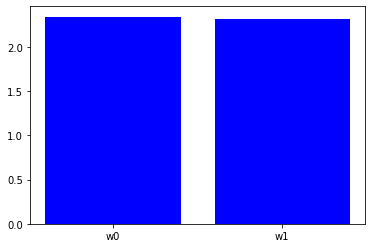

In [158]:
vis_weigths(weights)

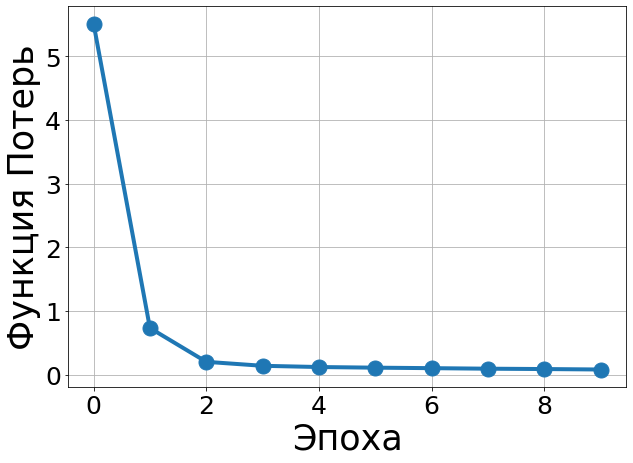

In [159]:
fig  = plt.figure(figsize=(10,7))

plot_cost(cost)

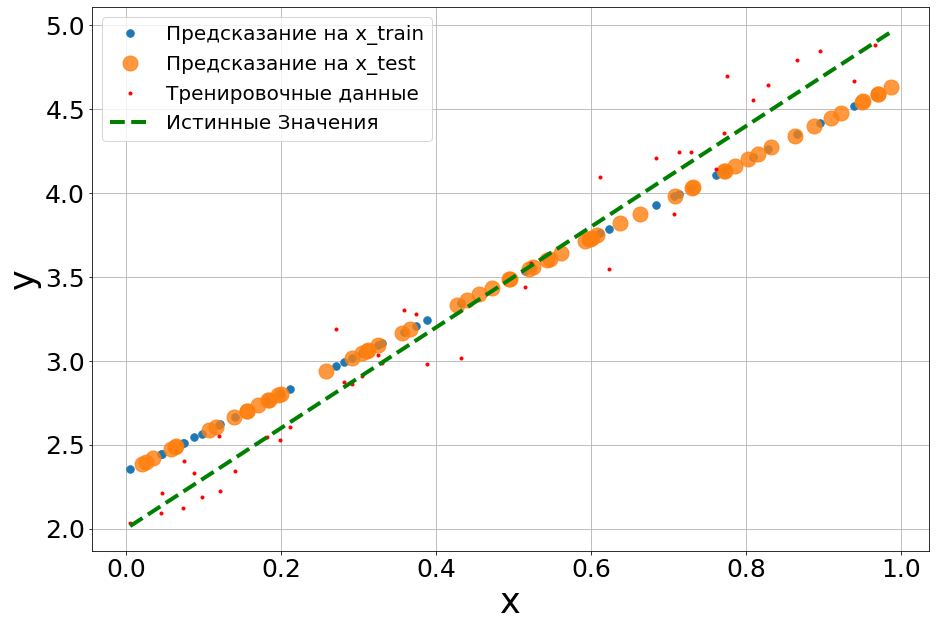

In [160]:
fig  = plt.figure(figsize=(15,10))

plot_model_weights(x_train, y_train, x_test, x, y_true, weights)

In [161]:
class LinearRegression():
    def __init__(self, 
                 learning_rate = 0.5, 
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000,
                 n_batches    = None,
                 random_state = 42):
        self.lr      = learning_rate
        self.epochs  = epochs
        self.weights = weights
        self.bias    = bias
        self.seed    = random_state
        self.batch_size = batch_size
        self.cost    = np.zeros(epochs)
        
        self.n_batches = n_batches
        
        if not(self.weights is None) and (self.bias):
            if self.weights.size == X.shape[1]:
                self.weights = np.append(self.bias,self.weights)
    
    #---------------------------------
    def forward(self, X):
        return np.dot(X, self.weights)
    
    #---------------------------------
    def loss(self,yhat, y):
        return np.square(yhat - y).sum()/y.size
    
    #---------------------------------
    def grad_step(self,yhat, y, X):
        return 2*np.dot(X.T, (yhat - y)) / y.size
    
    #---------------------------------
    def update(self):    
        return self.weights - self.lr*self.grad
    
    #---------------------------------
    def init(self, weights_size):
        np.random.seed(self.seed)
        return np.random.randn(weights_size)/np.sqrt(weights_size)
    
    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat.squeeze()
    
    #---------------------------------
    def score(self, X, y):        
        yhat = self.predict(X)
        return 1-np.sum(np.square(y-yhat))/np.sum(np.square(y-np.mean(y)))
    
    #---------------------------------
    def fit(self, X, y):

        np.random.seed(self.seed)

        if self.weights is None:
            self.weights = self.init(X.shape[1])
        
        if self.bias is None: 
            self.bias    = self.init(1)
        
        if self.weights.size == X.shape[1]:
            self.weights = np.append(self.bias,self.weights)
        
        self.grad    = np.zeros(self.weights.shape)
        self.cost    = np.zeros(self.epochs)

        if self.batch_size is None:            
            self.batch_size = y.size
            
        if self.n_batches is None:
            self.n_batches = y.size//self.batch_size
            
        for i in range(self.epochs): 
            loss = 0
            for cnt,(x_batch, y_batch) in enumerate(self.load_batch(X,y)): 

                yhat         = self.forward(x_batch)
                self.grad    = self.grad_step(yhat,  y_batch, x_batch) 
                self.weights = self.update() 
                loss += self.loss(yhat,  y_batch)
                
                if cnt>= self.n_batches:
                    break
            self.cost[i] = loss/self.n_batches
        
        self.bias = self.weights[0]
    #---------------------------------
    def load_batch(self,X,y):
        idxs = np.arange(y.size)
        np.random.shuffle(idxs)

        for i_batch in range(0,y.size,self.batch_size):
            idx_batch = idxs[i_batch:i_batch+self.batch_size]
            x_batch   = np.take(X, idx_batch,axis=0)
            x_batch   = self.add_bias(x_batch)
            y_batch   = np.take(y, idx_batch)
            yield  x_batch, y_batch
    
    #---------------------------------
    def add_bias(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))
    
    #---------------------------------
    def plot_cost(self, figsize = (12,6), title = ''):
        plt.figure(figsize = figsize)
        plt.plot(self.cost)
        plt.grid()
        plt.xlabel('Эпоха', fontsize = 24)
        plt.ylabel('Функция Потерь', fontsize = 24)
        plt.title(title, fontsize = 24)
        plt.show()
    
    #---------------------------------
    def get_w_and_b(self):
        return (self.weights[1:], self.bias)

**Полиноминальная зависимость**

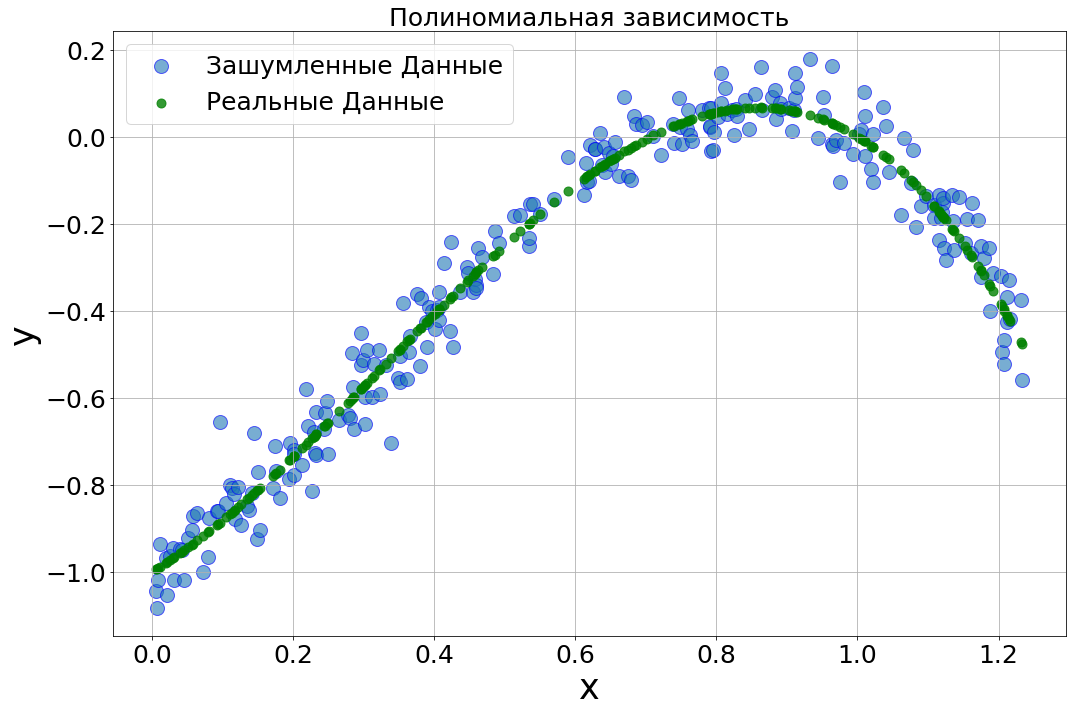

In [164]:
noise_power = 0.06

y, y_true, x = dataset(a = [1,2,-2], b = -1,
                       f = None,  N = 250,
                       x_max =1.25, 
                       noise_power = noise_power,
                       seed = 42)
vis_data(y, y_true,x, 'Полиномиальная зависимость')

In [165]:
x_train, y_train,  x_test, y_test = train_test_split(x, y,  test_size=0.3, )    

In [166]:
regr_poly_lin = LinearRegression(learning_rate=0.1,
                        epochs=10,batch_size=10,
                        n_batches=None)
regr_poly_lin.fit(x_train, y_train)

In [167]:
def plot_model_class(x_train, y_train, x_test, x, y, model):
    plt.plot(x_train[:,0], model.predict(x_train),
            '.', label='Предсказание на x_train',
            markersize = 15)
    plt.plot(x_test[:,0], model.predict(x_test),
            'o', label='Предсказание на x_test',
            markersize = 15, alpha =0.8)
    plt.plot(x_train[:,0], y_train, '.',
            label="Тренировочные данные", linewidth=2,c='r')
    plt.plot(x[:,0], y, '--',
            label="Истинные Значения", linewidth=4,c='g')
    plt.legend(fontsize=20); plt.grid()
    plt.xlabel('x',fontsize=35)
    plt.ylabel('y',fontsize=35);
    plt.xticks(FontSize = 25)
    plt.yticks(FontSize = 25);

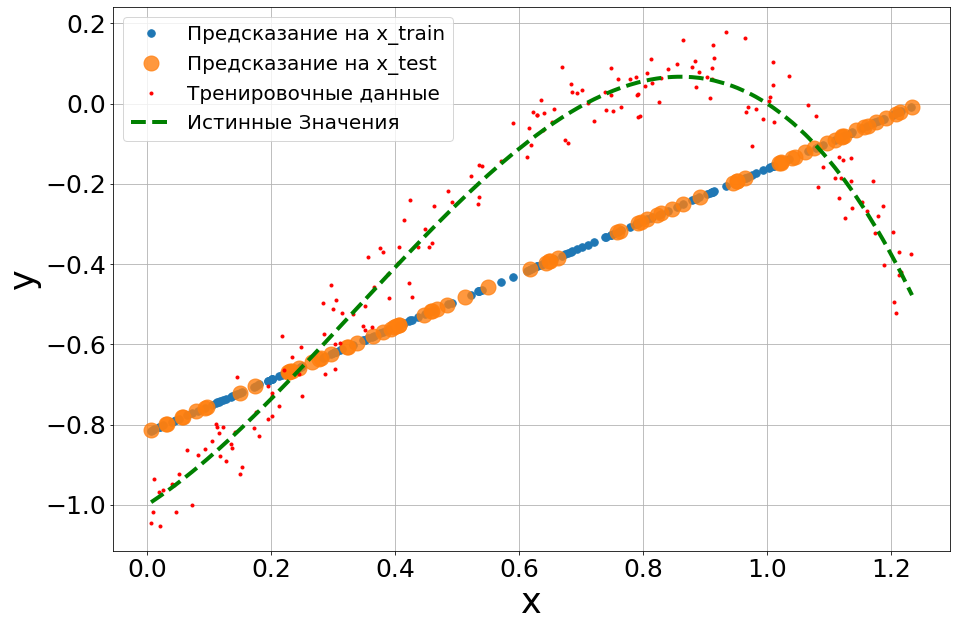

In [168]:
fig  = plt.figure(figsize=(15,10))

plot_model_class(x_train, y_train, x_test, x, y_true, regr_poly_lin)

In [169]:
def to_polynom(x, order = 1, add_bias = False):
    order_range = range( 0 if add_bias else 1, order+1,1)
    x = np.atleast_1d(x)[:]    
    out = np.array([])
    for i in order_range:
        out = np.append(out, np.power(x,i))
    return out.reshape(-1, x.size).T



In [170]:
x_ = to_polynom(x, order = 5) 
x_train, y_train,  x_test, y_test = train_test_split(x_, y,  test_size=0.3, )

In [171]:
regr_poly = LinearRegression(learning_rate=0.1,
                        epochs=100,batch_size=10,
                        n_batches=None)

In [172]:
regr_poly.fit(x_train, y_train)

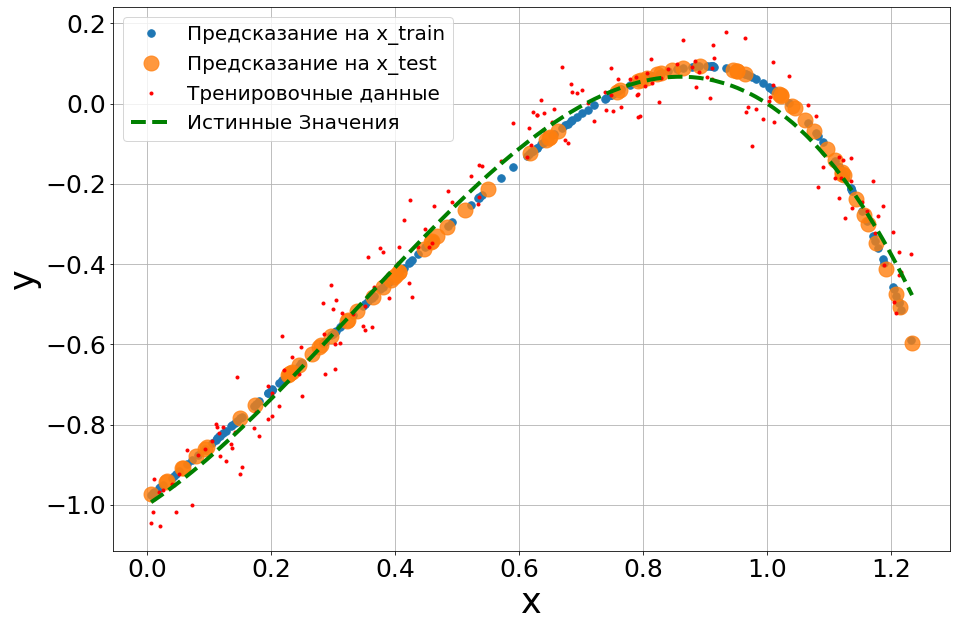

In [173]:
fig  = plt.figure(figsize=(15,10))

plot_model_class(x_train, y_train, x_test, x, y_true, regr_poly)


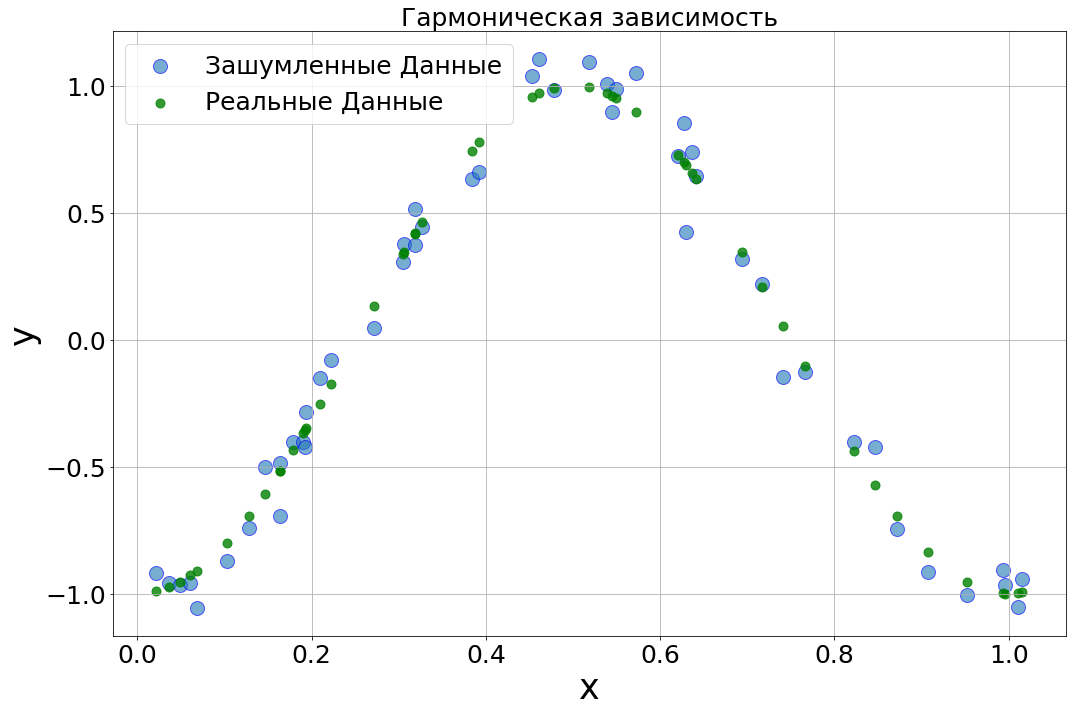

In [174]:
y, y_true, x = dataset(a = 2*np.pi,
                       b = np.pi, f = np.cos,  
                       N = 50, x_max =np.pi/3, 
                       noise_power = 0.1, seed = 42)
vis_data(y, y_true,x, 'Гармоническая зависимость')

In [175]:
x_train, y_train,  x_test, y_test = train_test_split(x, y,  test_size=0.3, )    
print(x_train.shape, y_train.shape,  x_test.shape, y_test.shape )

(35, 1) (35,) (15, 1) (15,)


Train Score = 0.00


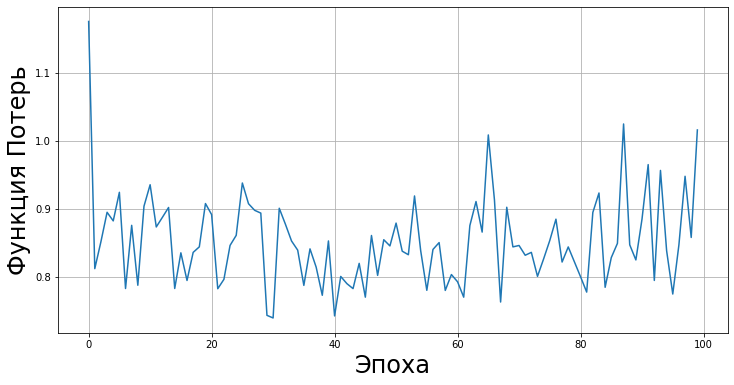

In [176]:
regr_harm = LinearRegression(learning_rate=0.25,
                        epochs=100,batch_size=10,
                        n_batches=None)
regr_harm.fit(x_train, y_train)

print(f'Train Score = {regr_harm.score(x_train, y_train):.2f}')
regr_harm.plot_cost()

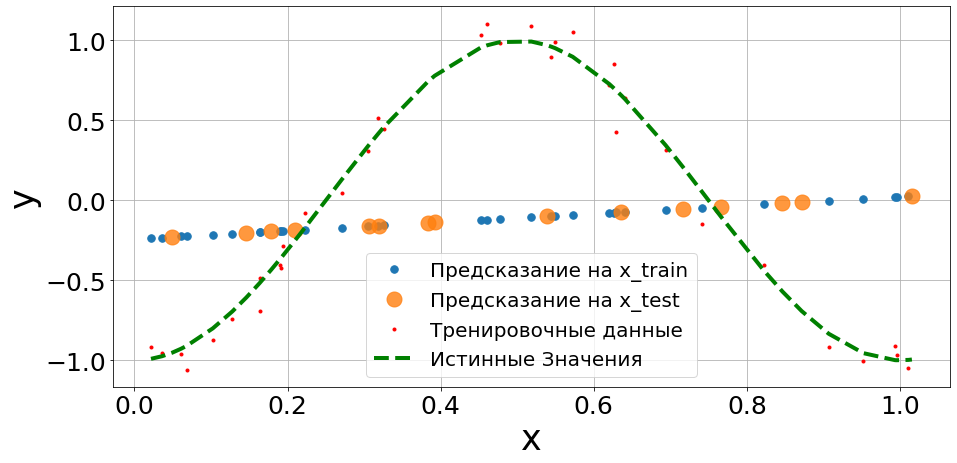

In [177]:
fig  = plt.figure(figsize=(15,7))

plot_model_class(x_train, y_train, x_test, x, y_true, regr_harm)

In [178]:
w, b = regr_harm.get_w_and_b()
print(w,b)

[0.26398754] -0.24167518488441947


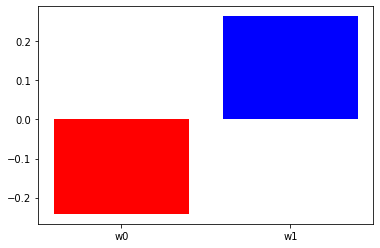

In [179]:
vis_weigths(np.hstack([b,w]))

In [180]:
order  = 10

x_train_ = to_polynom(x_train, order=order)
x_test_  = to_polynom(x_test,  order=order)


pd.DataFrame(x_train_).tail(4)

,0,1,2,3,4,5,6,7,8,9
31,0.190407,0.036255,0.006903,0.001314,2.502711e-04,4.765328e-05,9.073502e-06,1.727655e-06,3.289571e-07,6.263562e-08
32,0.640731,0.410536,0.263043,0.168540,1.079887e-01,6.919167e-02,4.433324e-02,2.840567e-02,1.820039e-02,1.166155e-02
33,0.036012,0.001297,0.000047,0.000002,6.056345e-08,2.180985e-09,7.854071e-11,2.828375e-12,1.018542e-13,3.667931e-15
34,0.326423,0.106552,0.034781,0.011353,3.705990e-03,1.209721e-03,3.948808e-04,1.288982e-04,4.207534e-05,1.373436e-05


Test Score = 0.41, Train Score = 0.68


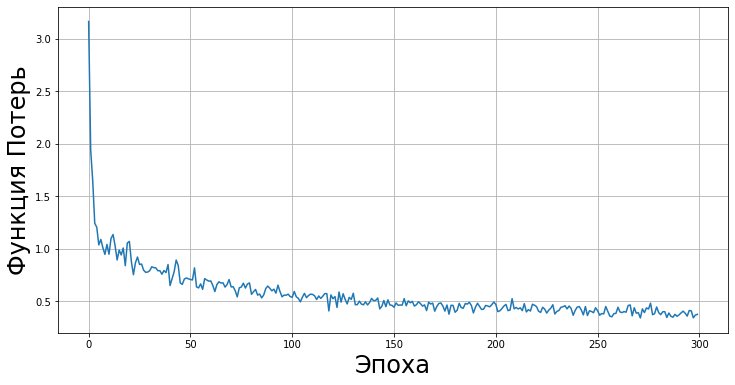

In [181]:

regr_harm_poly = LinearRegression(learning_rate=0.05,
                        epochs=300,batch_size=25,
                        n_batches=None
                        )

regr_harm_poly.fit(x_train_, y_train)
print(f'Test Score = {regr_harm_poly.score(x_test_, y_test):.2f}, Train Score = {regr_harm_poly.score(x_train_, y_train):.2f}')
regr_harm_poly.plot_cost()



In [182]:
w, b = regr_harm_poly.get_w_and_b()
print(w,b)

[ 2.10780575  0.42714302 -0.17405947 -0.2311899  -0.85745282 -0.80629031
 -0.13060886 -0.26815298 -0.53928071 -0.10548005] -0.6665371994488514


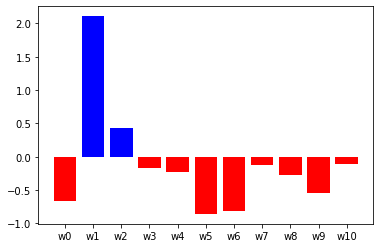

In [183]:
vis_weigths(np.hstack([b,w]))

In [184]:
np.sum(np.abs(w))

5.647463879933974

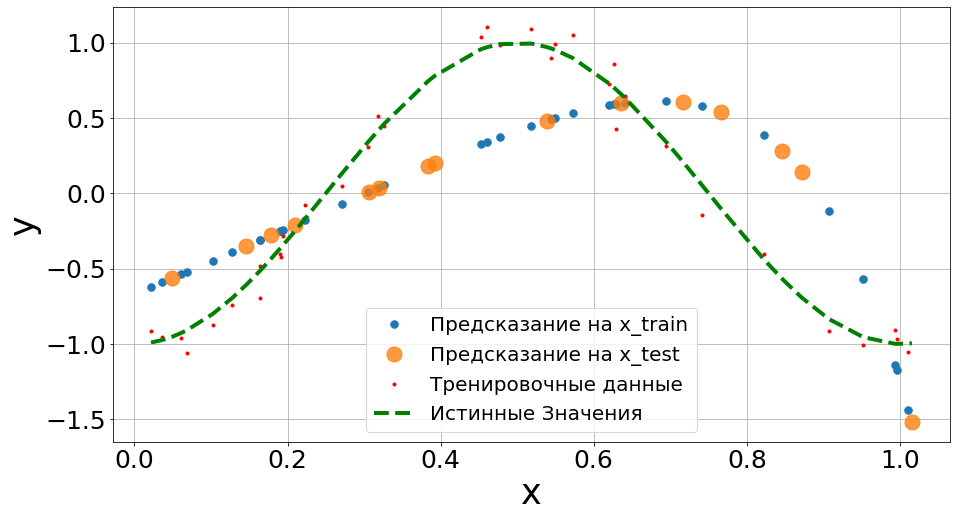

In [185]:
plt.figure(figsize=(15,8))

plot_model_class(x_train_, y_train, x_test_, x, y_true, regr_harm_poly)

In [186]:
class MinMaxScaler:
    def __init__(self):
        self.min = 0
        self.max = 0
    def fit(self,X):
        self.min = X.min(axis = 0)
        self.max = X.max(axis = 0)
        return self
    def transform(self,X):
        return (X- self.min)/(self.max-self.min)
    def fit_transform(self,X):
        return self.fit(X).transform(X)

class StandardScaler:
    def __init__(self):
        self.mean = 0
        self.std = 1
    def fit(self,X):
        self.mean = X.mean(axis = 0)
        self.std = X.std(axis = 0)
        return self
    def transform(self,X):
        return (X- self.mean)/(self.std)
    def fit_transform(self,X):
        return self.fit(X).transform(X)

In [187]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_)
x_test_scaled = scaler.transform(x_test_)

In [188]:
pd.DataFrame(x_test_scaled).tail(4)

,0,1,2,3,4,5,6,7,8,9
11,1.290826,1.314799,1.202790,1.042037,0.873383,0.713301,0.567758,0.438375,0.324924,0.226372
12,-0.818138,-0.806942,-0.701026,-0.607631,-0.541376,-0.496097,-0.464670,-0.442123,-0.425319,-0.412306
13,0.271678,-0.030467,-0.232614,-0.342675,-0.395187,-0.416225,-0.421213,-0.418529,-0.412527,-0.405378
14,0.860650,0.673987,0.441925,0.236037,0.072468,-0.051594,-0.143407,-0.210200,-0.258052,-0.291783


Test Score = 0.97, Train Score = 0.95


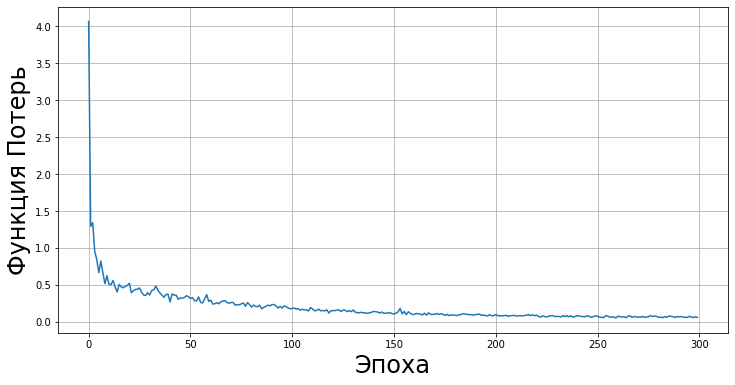

In [189]:

regr_harm_poly_scale = LinearRegression(learning_rate=0.05,
                        epochs=300,batch_size=25,
                        n_batches=None
                        )

regr_harm_poly_scale.fit(x_train_scaled, y_train)
print(f'Test Score = {regr_harm_poly_scale.score(x_test_scaled, y_test):.2f}, Train Score = {regr_harm_poly_scale.score(x_train_scaled, y_train):.2f}')
regr_harm_poly_scale.plot_cost()



In [190]:
w, b = regr_harm_poly_scale.get_w_and_b()
print(w,b)

[ 1.73051734 -0.26424088 -0.76261794 -0.58089313 -0.93862771 -0.63683296
  0.2562212   0.30131014  0.18156999  0.74026176] -0.060247959119143296


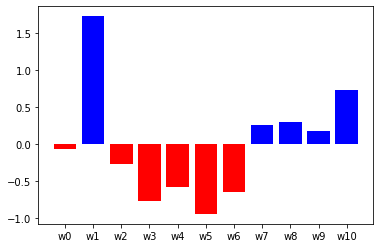

In [191]:
vis_weigths(np.hstack([b,w]))

In [192]:
np.sum(np.abs(w))

6.393093053066

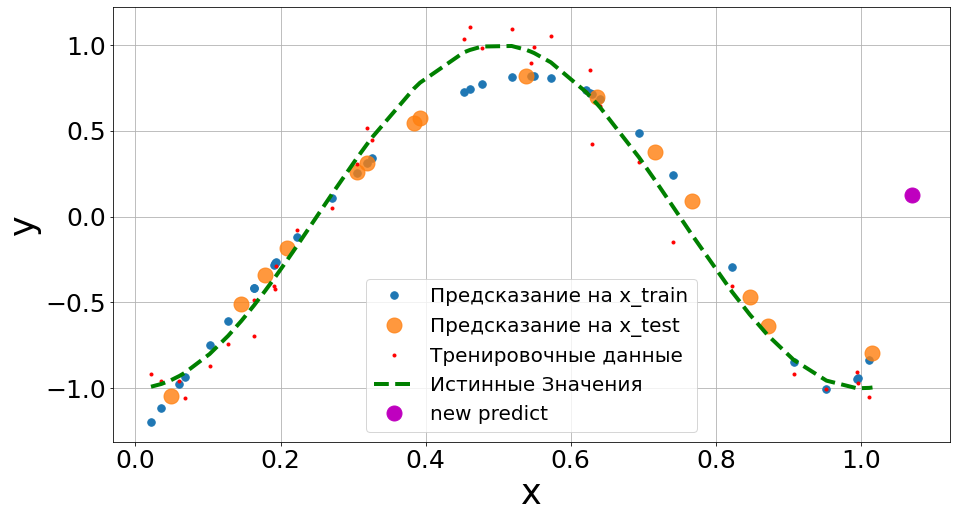

In [193]:
plt.figure(figsize=(15,8))

plt.plot(x_train_[:,0], regr_harm_poly_scale.predict(x_train_scaled),
        '.', label='Предсказание на x_train',
        markersize = 15)
plt.plot(x_test[:,0], regr_harm_poly_scale.predict(x_test_scaled),
        'o', label='Предсказание на x_test',
        markersize = 15, alpha =0.8)
plt.plot(x_train_[:,0], y_train, '.',
        label="Тренировочные данные", linewidth=2,c='r')
plt.plot(x[:,0], y_true, '--',
        label="Истинные Значения", linewidth=4,c='g')

plt.plot([1.07], 
         regr_harm_poly_scale.predict(scaler.transform(to_polynom([1.07], order=order))), 
         'mo',  label = 'new predict',
        markersize = 15 )
plt.legend(fontsize=20); plt.grid()
plt.xlabel('x',fontsize=35)
plt.ylabel('y',fontsize=35);
plt.xticks(FontSize = 25)
plt.yticks(FontSize = 25);



**Метод наименьших квадратов**

In [194]:
order = 10
x_train_ls = to_polynom(x_train, order=order, add_bias=True)
x_test_ls  = to_polynom(x_test,  order=order, add_bias=True)
weights  = np.linalg.lstsq(x_train_ls, y_train, rcond=None)[0] #including bias

In [195]:
weights

array([-8.69971720e-01, -1.05350795e+00, -9.49283445e+01,  1.99165390e+03,
       -1.41545730e+04,  5.41571702e+04, -1.24039972e+05,  1.74367054e+05,
       -1.47329953e+05,  6.86886777e+04, -1.35841838e+04])

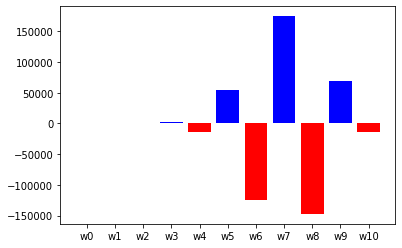

In [196]:
vis_weigths(weights)

In [197]:
np.sum(np.abs(weights))

598410.0894238536

In [198]:
def polyval(x,weights):
    return np.sum([np.power(x,i)*wi for i, wi in enumerate(weights) ],axis = 0) # including bias!

In [199]:
print(f"Test score: {r2_score(y_test, polyval(x_test,weights).squeeze()):.2f}, Train score: {r2_score(y_train, polyval(x_train,weights).squeeze()):.2f}")


Test score: 0.98, Train score: 0.99


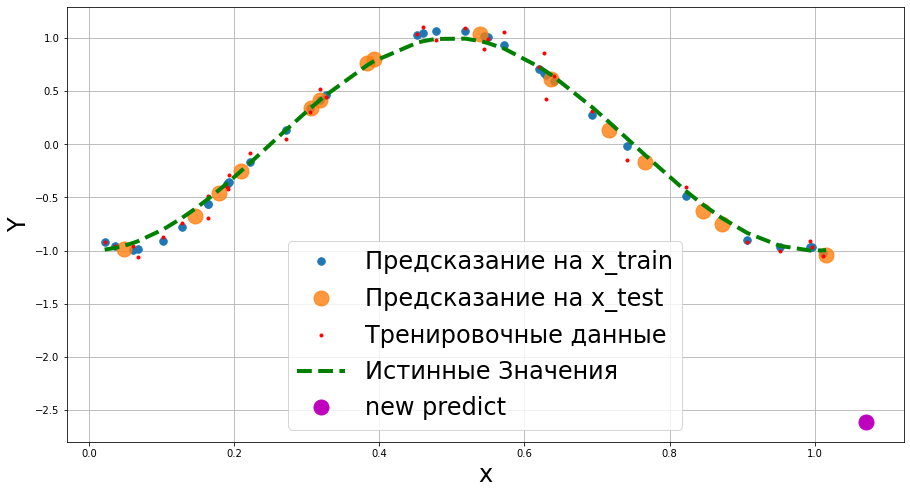

In [200]:
plt.figure(figsize=(15,8))

plt.plot(x_train_[:,0], polyval(x_train, weights),
        '.', label='Предсказание на x_train',
        markersize = 15)
plt.plot(x_test[:,0], polyval(x_test, weights),
        'o', label='Предсказание на x_test',
        markersize = 15, alpha =0.8)
plt.plot(x_train_[:,0], y_train, '.',
        label="Тренировочные данные", linewidth=2,c='r')
plt.plot(x[:,0], y_true, '--',
        label="Истинные Значения", linewidth=4,c='g')

plt.plot([1.07], 
         polyval([1.07], weights), 
         'mo',  label = 'new predict',
        markersize = 15 )

plt.grid()
plt.legend(fontsize = 24)
plt.xlabel('x', fontsize = 24)
plt.ylabel('Y', fontsize = 24)
plt.show()

# Задание #2: анализ файла cars_moldova

In [95]:
import seaborn as sns; 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

**Объединяем в единый класс все необходимые функции**

In [96]:
class LinearRegression():
  def __init__(self,
               learning_rate = 0.5,
               epochs   = 100,
               weights  = None,
               bias     = None,
               batch_size = 1000,
               random_state = 42):
    self.lr         = learning_rate
    self.epochs     = epochs
    self.weights    = weights
    self.bias       = bias
    self.seed       = random_state
    self.batch_size = batch_size
    self.cost       = np.zeros(epochs)

    # если веса и смещения заданы:
    if not(self.weights is None) and (self.bias):
      if self.weights.size == X.shape[1]:
        # совмещение в один массив, если это не было выполнено:

        self.weights = np.append(self.bias, self.weights)

  # прямоe распространение
  def forward(self, X):
      return self.weights.dot(X.T)

  # функция потерь
  def loss(self, yhat, y):
    return np.square(yhat - y).sum()/y.size

  # расчет градиента
  def grad_step(self, yhat, y, X):
    return 2*np.dot(X.T, (yhat - y)) / y.size

  # обновление весов
  def update(self):
    return self.weights - self.lr * self.grad

  # инициализация весов
  def init(self, weights_size):
    np.random.seed(self.seed)
    return np.random.randn(weights_size)/np.sqrt(weights_size)

  # добавление байсов (единицы)
  def add_bias(self, X):
    return np.column_stack((np.ones(X.shape[0]), X))

  # предсказания
  def predict(self, X):
    yhat = self.forward(self.add_bias(X))
    return yhat

  # оценка
  def score(self, X, y):
    yhat = self.predict(X)
    return 1-np.sum(np.square(y-yhat))/np.sum(np.square(y-np.mean(y)))

  # загрузка бэтча
  def load_batch(self, X, y):
    idx_batch = np.random.randint(0, X.shape[0],self.batch_size)
    x_batch   = np.take(X, idx_batch, axis=0)
    x_batch   = self.add_bias(x_batch)
    y_batch   = np.take(y, idx_batch)
    return x_batch, y_batch

  # основная функция фит
  def fit(self, X, y):

    np.random.seed(self.seed)

    if self.weights is None:
      self.weights = self.init(X.shape[1])

    if self.bias is None:
      self.bias    = self.init(1)

    if self.weights.size == X.shape[1]:
      self.weights = np.append(self.bias, self.weights)

    self.grad = np.zeros(self.weights.shape)
    self.cost = np.zeros(self.epochs)

    if self.batch_size is None:
      x_batch = self.add_bias(X)
      y_batch = y

    for i in range(self.epochs):

      if self.batch_size:
        x_batch, y_batch = self.load_batch(X, y)

      yhat          = self.forward(x_batch)
      self.grad     = self.grad_step(yhat, y_batch, x_batch)
      self.weights  = self.update()
      self.cost[i]  = self.loss(yhat, y_batch)

    self.bias = self.weights[0]

  # построение графика зависимости потерь
  def plot_cost(self, figsize = (12,6)):
    plt.figure(figsize = figsize)
    plt.plot(self.cost, '-*')
    plt.xlabel('Эпоха')
    plt.ylabel('Потери')
    plt.show()


  # функция возвращения текущих показателей весов и баясов
  def get_wb(self):
    return (self.weights[1:], self.bias)

Загружаем обработанный в предыдущем домашнем задании файл:

In [97]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Files/cars_moldova_new.csv',
            delimiter = ',')

df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,km_category
0,Rare expensive,Model S,2013,Hatchback,113000.0,367.0,Electric,Automatic,27000.0,9,12555.555556,Medium
1,Rare cheap,on-DO,2016,Sedan,150000.0,1596.0,Metan/Propan,Manual,3200.0,6,25000.000000,Big
2,Rare cheap,9-3,2007,Sedan,194777.0,2000.0,Petrol,Automatic,5000.0,15,12985.133333,Medium
3,Rare expensive,CTS,2015,Sedan,88000.0,2000.0,Petrol,Automatic,16950.0,7,12571.428571,Medium
4,Rare expensive,9000,1995,Hatchback,275000.0,2300.0,Petrol,Manual,36000.0,27,10185.185185,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
247,Rare cheap,469,1984,SUV,45000.0,2445.0,Metan/Propan,Manual,3400.0,38,1184.210526,Small
248,Rare cheap,Qq,2008,Hatchback,85000.0,800.0,Metan/Propan,Manual,2100.0,14,6071.428571,Small
249,Rare cheap,Hover,2008,SUV,18800.0,2400.0,Metan/Propan,Manual,5800.0,14,1342.857143,Small
250,Rare cheap,Qq,2008,Universal,160000.0,800.0,Metan/Propan,Manual,650.0,14,11428.571429,Medium


In [98]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission', 'km_category']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year', 'Age']

**Делим данные на тренировочные и тестовые**

In [99]:
df_num = df[num_columns].copy()

df_num.info()

# X - переменные, содержащие параметры, кроме целевой Price
# y - переменные, содержащие параметры Price

X,y = df_num.drop(columns = ['Price(euro)']).values, df_num['Price(euro)'].values

features_names = df_num.drop(columns = ['Price(euro)']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

scaler = MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pd.DataFrame(X_train).tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  252 non-null    int64  
 1   Distance              252 non-null    float64
 2   Engine_capacity(cm3)  252 non-null    float64
 3   Price(euro)           252 non-null    float64
 4   km_year               252 non-null    float64
 5   Age                   252 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 11.9 KB


,0,1,2,3,4
171,0.612245,0.304392,0.55000,0.442961,0.387755
172,0.979592,0.000000,0.44875,0.015823,0.020408
173,0.775510,0.153218,0.54925,0.361623,0.224490
174,0.836735,0.145046,0.32500,0.446545,0.163265
175,0.734694,0.147089,0.55000,0.300183,0.265306


## Подготавливаем модели линейной регрессии

**L1 регуляризация**

In [100]:
class LassoRegression(LinearRegression):
    def __init__(self, 
                 learning_rate = 0.5,
                 l1_penalty = 0.001,
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000, 
                 random_state = 42):
        
        super().__init__(learning_rate = learning_rate,
                         epochs = epochs, 
                         weights = weights, 
                         bias    = bias, 
                         batch_size   = batch_size, 
                         random_state = random_state)
        self.l1_penalty = l1_penalty
    
    #---------------------------------
    def loss(self,yhat, y):   
        l1_term = self.l1_penalty*np.sum(self.weights[1:])
        return np.square(yhat - y).mean() + l1_term
                  
    #---------------------------------
    def update(self):    
        return self.weights - self.lr*(self.grad + np.sign(self.weights)*self.l1_penalty)

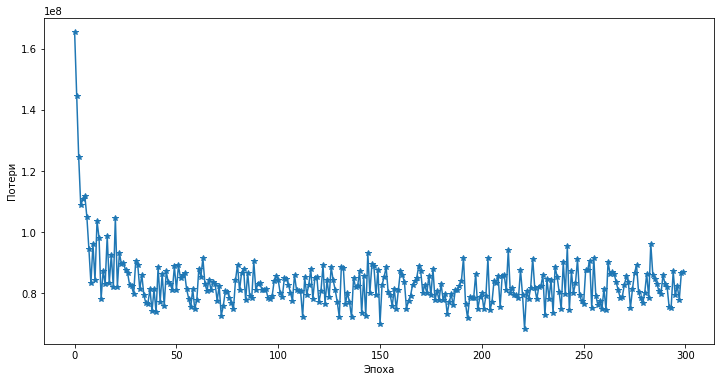

train R2: 0.2158; test R2: 0.1425


In [101]:
regr = LassoRegression(learning_rate=0.5,epochs=300,batch_size=3000, l1_penalty = 0.1)
regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train R2: %.4f; test R2: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

Тенденция на уменьшение потерь наблюдается; данные предсказываются с большей точностью.

Для оценки весов потребуется следующая функция:

In [121]:
def vis_weights(weights, names):
    numbers = np.arange(0,len(weights))
    tick_labels = names
    cc=['']*len(numbers)
    for n,val in enumerate(weights):
        if val<0:
            cc[n]='red'
        elif val>=0:
            cc[n]='blue'

    plt.bar(x = numbers, height = weights, color = cc)
    plt.xticks(np.arange(0,len(weights)),tick_labels, rotation = 'vertical');

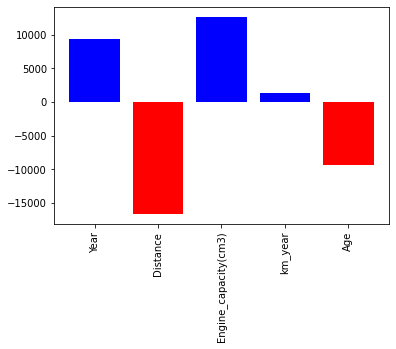

In [103]:
w, b = regr.get_wb()

vis_weights(w, features_names)

Из данных можно сделать вывод, что дистанция и возраст машины влияют меньше, чем остальные параметры.

**Эластичная регуляризация**

In [104]:
class ElasticRegression(LinearRegression):
    def __init__(self, 
                 learning_rate = 0.5,
                 l1_penalty = 0.001,
                 l2_penalty = 0.001,
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000, 
                 random_state = 42):
        
        super().__init__(learning_rate = learning_rate,
                         epochs = epochs, 
                         weights = weights, 
                         bias    = bias, 
                         batch_size   = batch_size, 
                         random_state = random_state)
        self.l1_penalty = l1_penalty
        self.l2_penalty = l2_penalty
    #---------------------------------
    def loss(self,yhat, y):   
        l1_term = self.l1_penalty*np.sum(self.weights[1:])
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))
        return np.square(yhat - y).mean() + l1_term + l2_term
                  
    
    #---------------------------------
    def update(self):    
        l2_term = self.l2_penalty*np.sum(self.weights[1:])
        return self.weights - self.lr*(self.grad +  np.sign(self.weights)*self.l1_penalty + l2_term)

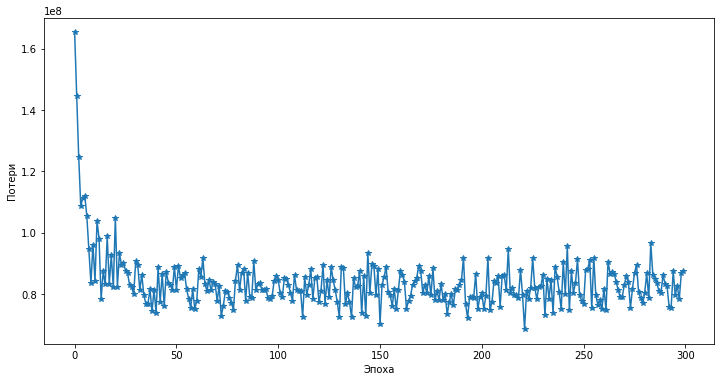

0.14302727964088835 0.21579236186862694


In [105]:
regr = ElasticRegression(learning_rate=0.5,epochs=300,batch_size=3000, l1_penalty = 0.1,l2_penalty = 0.001 )
regr.fit(X_train, y_train)

regr.plot_cost()

print(regr.score(X_test, y_test), regr.score(X_train, y_train))

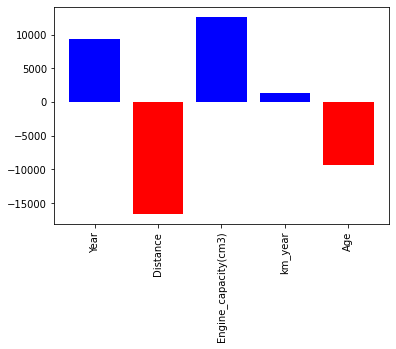

In [106]:
w, b = regr.get_wb()

vis_weights(w, features_names)

Результат аналогичен предыдущему: дистанция с возрастом влияют на цену меньше, чем остальные параметры

## Добавим категориальные признаки с помощью one-hot encoding

In [107]:
df_hot = pd.read_csv('drive/MyDrive/Colab Notebooks/Files/cars_moldova_onehot.csv',
                     delimiter=',')

df_hot.head(10)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,km_category_Big,km_category_Medium,km_category_Small
0,41,536,2011,4,195000.0,1800.0,2,1,7750.0,11,17727.272727,0,1,0
1,33,360,2014,11,135000.0,1500.0,0,0,8550.0,8,16875.000000,0,1,0
2,33,420,2012,11,110000.0,1500.0,0,0,6550.0,10,11000.000000,0,1,0
3,28,137,2006,11,200000.0,1600.0,3,0,4100.0,16,12500.000000,0,1,0
4,23,726,2000,5,300000.0,2200.0,0,0,3490.0,22,13636.363636,0,1,0
5,43,512,2010,11,290000.0,1390.0,4,0,5600.0,12,24166.666667,1,0,0
6,43,686,2010,9,220000.0,2400.0,0,1,17000.0,12,18333.333333,0,1,0
7,23,630,1991,10,240000.0,2300.0,4,0,2850.0,31,7741.935484,0,0,1
8,2,71,2004,10,325000.0,300.0,0,0,3400.0,18,18055.555556,0,1,0
9,23,273,2010,10,210000.0,2200.0,0,1,11400.0,12,17500.000000,0,1,0


In [108]:
numcolumns = []

for i in df_hot.columns:
  numcolumns += [i]

print('num_columns =', numcolumns)

num_columns = ['Make', 'Model', 'Year', 'Style', 'Distance', 'Engine_capacity(cm3)', 'Fuel_type', 'Transmission', 'Price(euro)', 'Age', 'km_year', 'km_category_Big', 'km_category_Medium', 'km_category_Small']


Делим данные на тестовые и тренировочные

In [109]:
df_num = df_hot[numcolumns].copy()

df_num.info()

X,y = df_num.drop(columns = ['Price(euro)']).values,df_num['Price(euro)'].values

features_names = df_num.drop(columns = ['Price(euro)']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler  = MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train) 
X_test  = scaler.transform(X_test) 

pd.DataFrame(X_train).tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32220 non-null  int64  
 1   Model                 32220 non-null  int64  
 2   Year                  32220 non-null  int64  
 3   Style                 32220 non-null  int64  
 4   Distance              32220 non-null  float64
 5   Engine_capacity(cm3)  32220 non-null  float64
 6   Fuel_type             32220 non-null  int64  
 7   Transmission          32220 non-null  int64  
 8   Price(euro)           32220 non-null  float64
 9   Age                   32220 non-null  int64  
 10  km_year               32220 non-null  float64
 11  km_category_Big       32220 non-null  int64  
 12  km_category_Medium    32220 non-null  int64  
 13  km_category_Small     32220 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 3.4 MB


,0,1,2,3,4,5,6,7,8,9,10,11,12
22549,0.977273,0.455484,0.40,0.363636,0.011012,0.291667,0.8,0.0,0.60,0.005179,0.0,0.0,1.0
22550,0.931818,0.691613,0.74,0.909091,0.208921,0.270833,0.4,1.0,0.26,0.297166,0.0,1.0,0.0
22551,0.136364,0.350968,0.84,0.272727,0.155127,0.270833,0.0,0.0,0.16,0.343601,0.0,1.0,0.0
22552,0.295455,0.500645,0.84,0.363636,0.219922,0.229167,0.8,1.0,0.16,0.487865,1.0,0.0,0.0
22553,0.818182,0.855484,0.94,0.909091,0.049905,0.375000,0.8,1.0,0.06,0.248497,0.0,1.0,0.0


In [110]:
def loss_func(predicts, labels):
        return np.square(predicts - labels)  

def forward(weights, inputs):
        return inputs.dot(weights.T)

def grad_loss(predicts, labels, inputs):
        return 2*(predicts - labels)*inputs/inputs.size

def update_weights(grad, weights, lerning_rate):
        return weights - lerning_rate*grad

def plot_cost(cost):
    plt.plot(cost, 'o-', linewidth = 4, markersize = 15, mfc='none' ); 
    plt.grid()
    plt.xlabel("Эпоха",fontsize=35)
    plt.ylabel("Функция Потерь",fontsize=35)
    plt.xticks(FontSize = 25)

    plt.yticks(FontSize = 25);  

In [112]:
weights = np.random.randn(X.shape[1])
print(weights)
yhat = forward(weights, X_train[0])
loss = np.sqrt(loss_func(yhat, y[0]))
print(yhat, y[0], loss)

[-0.1382643  -2.18009302  2.25854096  0.18522349 -1.0820669  -1.56053266
 -0.6203029   1.42344018  0.22298447  0.72551559  1.26549419  1.0922603
 -0.77499317]
1.4724873803024972 7750.0 7748.5275126196975


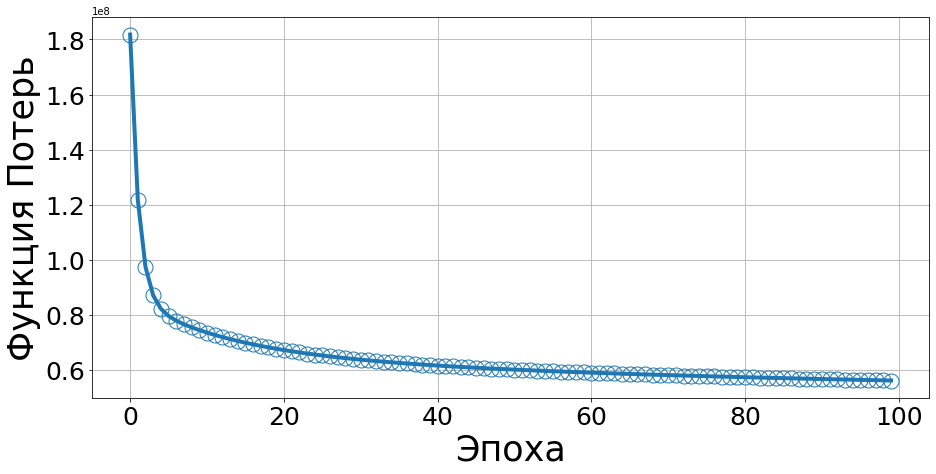

In [113]:
def weights_init(weights, random_state=42):
    if np.ndim(weights)<1:
        weights = np.zeros(weights)
        
    np.random.seed(random_state)
    return np.random.randn(*weights.shape)/np.sqrt(weights.size)

def fit(X, y, weights, lr,  epochs=30):
    
    cost = np.zeros(epochs)
    for i in range(epochs): 
        
        grad = np.zeros(weights.shape);
        loss = 0;
        
        for m in range(X.shape[0]): 
            yhat  = forward(weights, X[m,:])
            grad += grad_loss(yhat,  y[m], X[m,:])
            loss += loss_func(yhat,  y[m])

        weights = update_weights(grad/X.shape[0],weights, lr)  
        cost[i] = loss/X.shape[0]
    
    return weights, cost

weights = weights_init(X_train.shape[1], random_state=42)

weights, cost = fit(X_train, y_train, weights, lr=0.9,  epochs=100)

fig  = plt.figure(figsize=(15,7))
plot_cost(cost);

Тендценция на снижение потерь при повышении эпох также наблюдается

In [114]:
def predict(weights, inputs):
    yhat = np.zeros(inputs.shape[0])
    
    for m in range(inputs.shape[0]):
        yhat[m] = inputs[m,:].dot(weights.T)
    
    return yhat

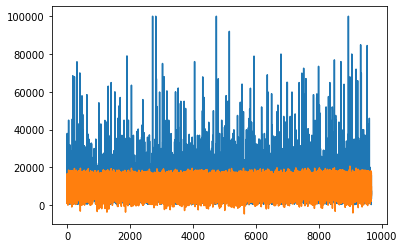

In [115]:
yhat = predict(weights, X_test)
plt.plot(y_test, label='original')
plt.plot(yhat, label='predicted');

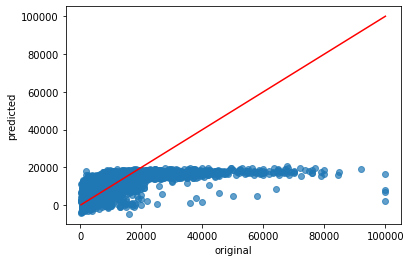

In [116]:
plt.scatter(y_test,yhat,alpha = 0.7)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r')
plt.xlabel('original')
plt.ylabel('predicted');

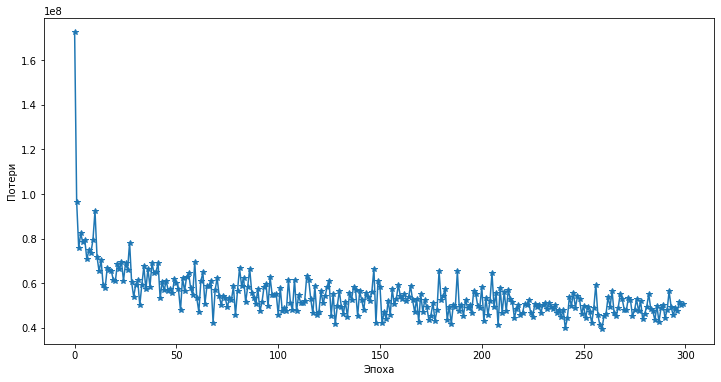

train R2: 0.4717; test R2: 0.4734


In [117]:
regr = LinearRegression(learning_rate=0.1,epochs=300,batch_size=3000)
regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train R2: %.4f; test R2: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))


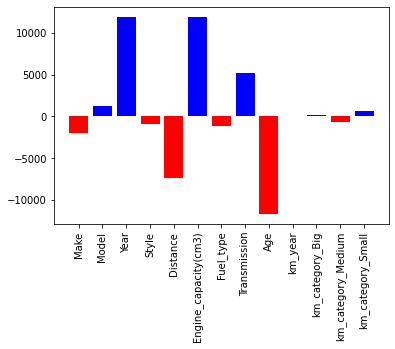

In [123]:
w, b = regr.get_wb()

vis_weights(w, features_names)

Исходя из визуализированных данных, для цены, помимо имеющихся изначально заданных числовых значений, важны также машины с малым проездом